# Exploratory Data Analysis using Python - Stack-Overflow Developer Survey

*Analyzing responses from the Stack Overflow Annual Developer Survey 2020*

![](https://i.imgur.com/qXhHKqv.png)

## Learning Outline of Notebook
The following topics are covered in this notebook:

- Selecting and downloading a dataset
- Data preparation and cleansing
- Exploratory analysis and visualization
- Asking and answering interesting questions
- Summarizing inferences and drawing conclusions

## Introduction

In this notebook, we'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey.

There are several options for getting the dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the `urlretrieve` function from the `urllib.request` to download CSV files from a raw URL
- Use a helper library, e.g., `opendatasets`, which contains a collection of curated datasets and provides a helper function for direct download.

We'll use the `opendatasets` helper library to download the files.

In [2]:
!pip install opendatasets

  Obtaining dependency information for opendatasets from https://files.pythonhosted.org/packages/00/e7/12300c2f886b846375c78a4f32c0ae1cd20bdcf305b5ac45b8d7eceda3ec/opendatasets-0.1.22-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 402.9 kB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for python-slugify from https://files.pythonhosted.org/packages/a4/62/02da182e544a51a5c3ccf4b03ab79df279f9c60c5e82d5e8bec7ca26ac11/python_slugify-8.0.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for bleach from https://files.pythonhosted.org/packages/fc/55/96142937f66150805c25c4d0f31ee4132fd33497753400734f9dfdcbdc66/bleach-6.2.0-py3-none-any.whl.metadata
  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Obtaining dependency information for webencodings from https://files.pythonhosted.org/p

In [3]:
import opendatasets as od
od.download('stackoverflow-developer-survey-2020')

94609408it [01:54, 827724.07it/s]                               


16384it [00:00, 18337.53it/s]           


8192it [00:00, 11562.47it/s]            


In [7]:
!ls stackoverflow-developer-survey-2020/

README.txt                survey_results_public.csv survey_results_schema.csv


Let's verify that the dataset was downloaded into the directory `stackoverflow-developer-survey-2022` and retrieve the list of files in the dataset.

In [22]:
import os

In [4]:
# Here write your code

You can through the downloaded files using the "File" > "Open" menu option in Jupyter. It seems like the dataset contains three files:

- `README.txt` - Information about the dataset
- `survey_results_schema.csv` - The list of questions, and shortcodes for each question
- `survey_results_public.csv` - The full list of responses to the questions 

Let's load the CSV files using the Pandas library. We'll use the name `survey_raw_df` for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')
survey_raw_df.shape

(64461, 61)

The dataset contains over 40000 responses to 61 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

`Let's view the list of columns in the data frame.`

In [10]:
# here write your code
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears that shortcodes for questions have been used as column names. 

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: `Column` and `QuestionText`. We can load it as Pandas Series with `Column` as the index and the  `QuestionText` as the value.

In [ ]:
scheme_fname = "stack-overflow-developer-survey-2020/survey_results_schema.csv"
scheme_raw = pd.read_csv(scheme_fname, index_col='Column').QuestionText
scheme_raw.head(20)

We can now use `schema_raw` to retrieve the full question text for any column in `survey_raw_df` like this
![](images/s1.png)

In [ ]:
# Here write your code
scheme_raw['Country']

We've now loaded the dataset. We're ready to move on to the next step of `preprocessing` & `cleaning` the data for our analysis.

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [37]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

Display total number of `select_columns`.

In [ ]:
# Here write your code
len(selected_columns)

Let's extract a copy of the data from these columns into a new data frame `survey_df`. We can continue to modify further without affecting the original data frame.

In [ ]:
# Here write your code
survey_df = survey_raw_df[selected_columns].copy()
survey_df

Let's view some basic information about the data frame.m

Display total number of rows and columns in the `survey_df`

In [ ]:
# Here write your code
survey_df.shape

Display basic information of `survey_df`

In [41]:
# Here write your code
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 39763 non-null  object 
 1   Age                     28228 non-null  float64
 2   Gender                  31446 non-null  object 
 3   EdLevel                 35703 non-null  object 
 4   UndergradMajor          31644 non-null  object 
 5   Hobbyist                39974 non-null  object 
 6   Age1stCode              35993 non-null  object 
 7   YearsCode               35854 non-null  object 
 8   YearsCodePro            28776 non-null  object 
 9   LanguageWorkedWith      35666 non-null  object 
 10  LanguageDesireNextYear  33625 non-null  object 
 11  NEWLearn                34892 non-null  object 
 12  NEWStuck                34163 non-null  object 
 13  Employment              39631 non-null  object 
 14  DevType                 30677 non-null

#### Interpretation
- Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (40000). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 


Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to `NaN`.

In [51]:
# # Here write your code
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Let's now display some basic statistics about numeric columns.

In [44]:
# Here write your code
survey_df.describe()

,Age,WorkWeekHrs
count,28222.000000,25550.000000
mean,30.902370,40.800189
std,9.514331,18.199172
min,11.000000,1.000000
25%,24.000000,40.000000
50%,29.000000,40.000000
75%,35.000000,44.000000
max,99.000000,475.000000


#### Interpretation
There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. We can do this using the `.drop` method, [as explained here](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/).

In [42]:
# Here write your code 
index = survey_df[((survey_df.Age>100) | (survey_df.Age<10))].index
survey_df.drop(index=index, inplace=True)

In [43]:
survey_df.describe()

,Age,WorkWeekHrs
count,28222.000000,25550.000000
mean,30.902370,40.800189
std,9.514331,18.199172
min,11.000000,1.000000
25%,24.000000,40.000000
50%,29.000000,40.000000
75%,35.000000,44.000000
max,99.000000,475.000000


The same holds for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [45]:
# Here write your code
index = survey_df[survey_df.WorkWeekHrs>140].index
survey_df.drop(index=index, inplace=True)
# index

In [46]:
survey_df.describe()

,Age,WorkWeekHrs
count,28149.000000,25458.000000
mean,30.899133,40.004511
std,9.509593,10.589387
min,11.000000,1.000000
25%,24.000000,40.000000
50%,29.000000,40.000000
75%,35.000000,43.000000
max,99.000000,140.000000


The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis. We just use 2 values `Man` or `Womam`

In [47]:
survey_df.Gender.value_counts()

Gender
Man                                                            28577
Woman                                                           2368
Non-binary, genderqueer, or gender non-conforming                237
Man;Non-binary, genderqueer, or gender non-conforming             71
Woman;Non-binary, genderqueer, or gender non-conforming           54
Woman;Man                                                         43
Woman;Man;Non-binary, genderqueer, or gender non-conforming       15
Name: count, dtype: int64

In [50]:
# Here write your code
# survey_df.Gender != "Man"
def clean_gender(x):
    if x=='Man':
        return 'Man'
    elif x=='Woman':
        return "Woman"
    elif x==np.nan:
        return np.nan
    else:
        return 'Other'

In [51]:
survey_df.Gender = survey_df.Gender.apply(clean_gender)


In [52]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,NaN,NaN,Other,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
1,Georgia,NaN,Other,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18,4,2,NaN,NaN,NaN,NaN,Employed full-time,"Developer, full-stack",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,United States,27.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,20,4,3,HTML/CSS;JavaScript;PHP;TypeScript,C++;HTML/CSS;TypeScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack",35.0,Very satisfied,"Languages, frameworks, and other technologies ...",Never,Not at all important/not necessary
3,Nigeria,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,22,5,2,HTML/CSS;Python;SQL,Haskell;HTML/CSS;JavaScript;Kotlin;Python,Every few months,Meditate;Call a coworker or friend;Visit Stack...,"Independent contractor, freelancer, or self-em...","Designer;Developer, back-end;Developer, deskto...",NaN,NaN,"Languages, frameworks, and other technologies ...",NaN,Critically important
4,India,36.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,15,16,10,HTML/CSS;JavaScript;Python;SQL,HTML/CSS;Python;SQL;TypeScript,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack",42.0,Slightly satisfied,Specific department or team I’d be working on;...,Sometimes: 1-2 days per month but less than we...,Very important


We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [53]:
# Here write your code
survey_df.sample(5)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
9548,Israel,63.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,20,8,2,Python,Python,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,"Independent contractor, freelancer, or self-em...","Designer;Developer, back-end;Engineer, data",10.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Specific depa...,Occasionally: 1-2 days per quarter but less th...,Critically important
34286,Uruguay,22.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,15,7,1,Java;Rust;Scala,Java;Rust,Every few months,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Data or business analyst;Developer, back-end",8.0,Very satisfied,Industry that I’d be working in;Flex time or a...,Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
36760,Australia,35.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A business discipline (such as accounting, fin...",Yes,10,25,8,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Type...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Type...,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, front-end;Developer, full-stack;Eng...",45.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
31773,United States,37.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",Yes,10,27,10,Bash/Shell/PowerShell;HTML/CSS;Python;SQL,C++;Go;JavaScript;Python;TypeScript,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Database administrator;Developer, back-end;Dev...",35.0,Very dissatisfied,Remote work options;Office environment or comp...,Rarely: 1-2 days per year or less,Fairly important
15794,United States,40.0,Other,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,14,26,18,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;J...,C++,Once a year,Call a coworker or friend;Go for a walk or oth...,Employed full-time,"Developer, front-end;Developer, full-stack",40.0,Very satisfied,Flex time or a flexible schedule;Opportunities...,Sometimes: 1-2 days per month but less than we...,Fairly important


## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).

In [54]:
%matplotlib inline
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [55]:
scheme_raw.Country

'Where do you live?'

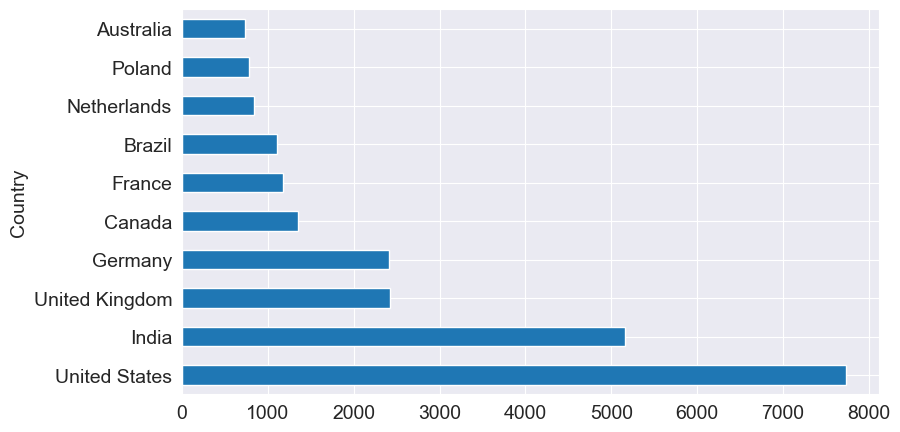

In [56]:
# Here write your answer
survey_df.Country.value_counts().head(10).plot(kind='barh');

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [53]:
# Here write your answer

We can visualize this information using a `bar chart`.

In [62]:
# Here write your code

**Interpretation:**
It appears that a disproportionately high number of respondents are from the US and etc, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

> **Exercise**: Try finding the percentage of responses from English-speaking vs. non-English speaking countries. You can use [this list of languages spoken in different countries](https://github.com/bsef19m521/DatasetsForProjects/blob/master/countries-languages.csv).

### Age

The distribution of respondents' age is another crucial factor to look at. We can use a `histogram` to visualize it. 

In [ ]:
# Here write your code
survey_df.Age.describe()

In [ ]:
sns.histplot(survey_df.Age);

**Interpretation:**
It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

> **Exercise**: You may want to filter out responses by age (or age group) if you'd like to analyze and compare the survey results for different age groups. Create a new column called AgeGroup containing values like `Less than 10 years`, `10-18 years`, `18-30 years`, `30-45 years`, `45-60 years` and `Older than 60 years`. Then, repeat the analysis in the rest of this notebook for each age group.


### Gender

Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [ ]:
scheme_raw.Gender

Display `Gender` distribution along with their `values`

In [ ]:
# Here write your code
survey_df.Gender.value_counts().plot(kind='pie',)

Use a `pie chart` or `countplot` to visualize the distribution.

In [ ]:
# Here write your code
sns.countplot(x= survey_df.Gender);

> **Here write your observation about visualization**:
    

> **Exercise**: It would be interesting to compare the survey responses & preferences across genders. Repeat this analysis with these breakdowns. How do the relative education levels differ across genders? How do the salaries vary? You may find this analysis on the [Gender Divide in Data Science](https://medium.com/datadriveninvestor/exploratory-data-analysis-eda-understanding-the-gender-divide-in-data-science-roles-9faa5da44f5b) useful.

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

In [ ]:
# Here write your code
scheme_raw.EdLevel

In [ ]:
survey_df.EdLevel.value_counts()

In [ ]:
survey_df.EdLevel.value_counts(normalize=True).plot(kind='barh');

In [ ]:
# plt.figure(figsize=(10,10))
sns.set(rc={'figure.figsize':(15,10)})
pd.crosstab(index=survey_df.EdLevel, columns=survey_df.Gender,normalize=True).plot(kind='barh');

**Interpretation:**
It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

> **Exercises**: The graph currently shows the number of respondents for each option. Can you modify it to show the percentage instead? Further, try comparing the percentages for each degree for men vs. women. 

Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

### UndergradMajor

Let's also plot `undergraduate majors`, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [88]:
# Here write your code

In [ ]:
scheme_raw.UndergradMajor

In [ ]:
survey_df.UndergradMajor.value_counts(normalize=True).plot(kind='barh')

**Observation:**
It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

> **Exercises**: Analyze the `NEWEdImpt` column for respondents who hold some college degree vs. those who don't. Do you notice any difference in opinion?

### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column using `barplot` or `countplot`.

In [ ]:
scheme_raw.Employment

In [95]:
# Here write your code

In [ ]:
Emp_result = survey_df.Employment.value_counts(normalize=True, ascending=False)*100
Emp_result.plot(kind='barh')

**Observation:**
It appears that close to 10% of respondents are employed part time or as freelancers.

> **Exercise**: Add a new column `EmploymentType` containing the values `Enthusiast` (student or not employed but looking for work), `Professional` (employed full-time, part-time or freelancing), and `Other` (not employed or retired). For each of the graphs that follow, show a comparison between `Enthusiast` and `Professional`.

### DevType

The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [ ]:
scheme_raw.DevType

In [115]:
# survey_df.DevType.value_counts()

In [116]:
# survey_df.DevType.str.split(";").value_counts()

In [ ]:
s1 = survey_df.DevType
s1

In [ ]:
s1.value_counts()

In [152]:
s1.str.split(';').dropna()

In [ ]:
s1

In [ ]:
pd.DataFrame(data=s1.str.split(";"))

In [168]:
# survey_df.DevType.loc[survey_df.DevType.to_frame().notna()[0]]

In [178]:
new = {}
for x in survey_df.DevType.dropna():
    for d in x.split(';'):
        if d not in new:
            new[d] = 1
        else:
            new[d] +=1

In [ ]:
new

In [ ]:
{k:v for k,v in sorted(new.items(), key=lambda x:x[1])}